# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&q=jamestown&appid={weather_api_key}'
response = requests.get(url)
data = response.json()

In [35]:
print(data.keys())
data
i = 0
counter = 1

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])


In [43]:
print('Start Data Collection')
print("")
result = []

for city in cities:
    try: 
        url = f'http://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city}&appid={weather_api_key}'
        response = requests.get(url)
        data = response.json()

        city = data['name']
        lat = float(data['coord']['lat'])
        long = data['coord']['lon']
        temp = data['main']['temp_max']
        humid = data['main']['humidity']
        cloud = data['clouds']['all']
        windSpd = data['wind']['speed']
        country = data['sys']['country']
        date = data['dt']
        hemi = ''
        
        if lat > 0:
            hemi = 'north'
        elif lat < 0:
            hemi = 'south'
    
        tempDict = {'City': city,
                'Lat':lat,
                'Lng': long,
                'Max Temp':temp,
                'Humidity':humid,
                'Cloudiness':cloud,
                'Wind Speed':windSpd,
                'Country':country,
                'Date':date,
                'Hemi': hemi}
    
        result.append(tempDict)
        if i > 49:
            i = 0
            counter = counter + 1
        else:
            i = i + 1
        
        print(f'Processing record {i} of set {counter} : {city}')
    
    except(KeyError, IndexError):
        print('City not found. Skipping...')
              
print("")
print('End Data Collection')
print("")

Start Data Collection

Processing record 16 of set 12 : Statesboro
Processing record 17 of set 12 : Mataura
City not found. Skipping...
Processing record 18 of set 12 : Kapaa
Processing record 19 of set 12 : Carutapera
Processing record 20 of set 12 : Mount Gambier
Processing record 21 of set 12 : Esperance
Processing record 22 of set 12 : Vieux Fort
City not found. Skipping...
Processing record 23 of set 12 : Bluff
Processing record 24 of set 12 : Busselton
Processing record 25 of set 12 : Terrace
City not found. Skipping...
Processing record 26 of set 12 : Khatanga
Processing record 27 of set 12 : Punta Arenas
Processing record 28 of set 12 : Marawi
Processing record 29 of set 12 : Salalah
Processing record 30 of set 12 : East London
Processing record 31 of set 12 : Portland
Processing record 32 of set 12 : Palmer
Processing record 33 of set 12 : Dămuc
Processing record 34 of set 12 : Malinovskiy
Processing record 35 of set 12 : Narsaq
Processing record 36 of set 12 : Butaritari
Proc

Processing record 46 of set 15 : Zyryanovsk
Processing record 47 of set 15 : Manggar
Processing record 48 of set 15 : Longyearbyen
Processing record 49 of set 15 : Shache
Processing record 50 of set 15 : Iralaya
Processing record 0 of set 16 : Saskylakh
Processing record 1 of set 16 : Dingle
Processing record 2 of set 16 : Rindal
City not found. Skipping...
Processing record 3 of set 16 : Ribeira Grande
Processing record 4 of set 16 : Ishigaki
Processing record 5 of set 16 : Khipro
Processing record 6 of set 16 : Jijiga
Processing record 7 of set 16 : Cervo
Processing record 8 of set 16 : Pisco
Processing record 9 of set 16 : Poum
Processing record 10 of set 16 : Tuy Hoa
Processing record 11 of set 16 : Clyde River
Processing record 12 of set 16 : Barcelos
Processing record 13 of set 16 : Vila Velha
Processing record 14 of set 16 : Mezhdurechensk
Processing record 15 of set 16 : Coyhaique
City not found. Skipping...
Processing record 16 of set 16 : São João Nepomuceno
Processing record

Processing record 24 of set 19 : Santa Rita do Sapucaí
Processing record 25 of set 19 : San Jose
Processing record 26 of set 19 : Yangi Marg`ilon
Processing record 27 of set 19 : Avera
Processing record 28 of set 19 : Soyo
City not found. Skipping...
Processing record 29 of set 19 : Fortuna
Processing record 30 of set 19 : Sitka
Processing record 31 of set 19 : Rabo de Peixe
Processing record 32 of set 19 : Naze
Processing record 33 of set 19 : Itupiranga
Processing record 34 of set 19 : Sindor
Processing record 35 of set 19 : Den Helder
Processing record 36 of set 19 : Ous
Processing record 37 of set 19 : Evensk
Processing record 38 of set 19 : Clovis
Processing record 39 of set 19 : Sauce
Processing record 40 of set 19 : Weligama
Processing record 41 of set 19 : Honiara
Processing record 42 of set 19 : Wewak
City not found. Skipping...
Processing record 43 of set 19 : Krasnaya Yaruga
Processing record 44 of set 19 : Mokhsogollokh
Processing record 45 of set 19 : Almaznyy
Processing r

Processing record 8 of set 23 : Qui Nhon
Processing record 9 of set 23 : Cockburn Town
Processing record 10 of set 23 : Weihe
Processing record 11 of set 23 : Samarina
Processing record 12 of set 23 : La Ronge
Processing record 13 of set 23 : Key West
Processing record 14 of set 23 : Lumding
Processing record 15 of set 23 : Dzilam González
Processing record 16 of set 23 : Vodnyy
Processing record 17 of set 23 : Likhoy
Processing record 18 of set 23 : Batagay-Alyta
Processing record 19 of set 23 : Kyzyl
Processing record 20 of set 23 : Suamico
Processing record 21 of set 23 : Ürümqi
Processing record 22 of set 23 : Iqaluit
Processing record 23 of set 23 : Sinjār
Processing record 24 of set 23 : Kavaratti
Processing record 25 of set 23 : Sumbuya
City not found. Skipping...
Processing record 26 of set 23 : Trofors
Processing record 27 of set 23 : Aklavik
Processing record 28 of set 23 : Owando
Processing record 29 of set 23 : Elliot Lake
Processing record 30 of set 23 : Gobabis

End Data 

In [44]:
result

[{'City': 'Statesboro',
  'Lat': 32.4488,
  'Lng': -81.7832,
  'Max Temp': 55.2,
  'Humidity': 28,
  'Cloudiness': 0,
  'Wind Speed': 10.36,
  'Country': 'US',
  'Date': 1642975530,
  'Hemi': 'north'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 57.47,
  'Humidity': 50,
  'Cloudiness': 51,
  'Wind Speed': 1.32,
  'Country': 'NZ',
  'Date': 1642975531,
  'Hemi': 'south'},
 {'City': 'Kapaa',
  'Lat': 22.0752,
  'Lng': -159.319,
  'Max Temp': 79.12,
  'Humidity': 72,
  'Cloudiness': 20,
  'Wind Speed': 3,
  'Country': 'US',
  'Date': 1642975532,
  'Hemi': 'north'},
 {'City': 'Carutapera',
  'Lat': -1.195,
  'Lng': -46.02,
  'Max Temp': 76.77,
  'Humidity': 92,
  'Cloudiness': 77,
  'Wind Speed': 6.62,
  'Country': 'BR',
  'Date': 1642975533,
  'Hemi': 'south'},
 {'City': 'Mount Gambier',
  'Lat': -37.8333,
  'Lng': 140.7667,
  'Max Temp': 76.26,
  'Humidity': 40,
  'Cloudiness': 78,
  'Wind Speed': 3.18,
  'Country': 'AU',
  'Date': 1642975533,
  'Hemi': 'sout

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
weather_df = pd.DataFrame(result)
weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemi
0,Statesboro,32.4488,-81.7832,55.20,28,0,10.36,US,1642975530,north
1,Mataura,-46.1927,168.8643,57.47,50,51,1.32,NZ,1642975531,south
2,Kapaa,22.0752,-159.3190,79.12,72,20,3.00,US,1642975532,north
3,Carutapera,-1.1950,-46.0200,76.77,92,77,6.62,BR,1642975533,south
4,Mount Gambier,-37.8333,140.7667,76.26,40,78,3.18,AU,1642975533,south
...,...,...,...,...,...,...,...,...,...,...
571,Trofors,65.5333,13.4063,44.47,94,100,38.65,NO,1642975906,north
572,Aklavik,68.2191,-135.0107,2.01,98,96,4.88,CA,1642975907,north
573,Owando,-0.4819,15.8999,77.54,57,99,2.73,CG,1642975907,south
574,Elliot Lake,46.3834,-82.6331,5.27,83,71,6.55,CA,1642975908,north


In [46]:
weather_df.to_csv(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/weather_output.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [47]:
weather_df = weather_df.loc[(weather_df['Humidity'] <= 100)]
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemi
0,Statesboro,32.4488,-81.7832,55.20,28,0,10.36,US,1642975530,north
1,Mataura,-46.1927,168.8643,57.47,50,51,1.32,NZ,1642975531,south
2,Kapaa,22.0752,-159.3190,79.12,72,20,3.00,US,1642975532,north
3,Carutapera,-1.1950,-46.0200,76.77,92,77,6.62,BR,1642975533,south
4,Mount Gambier,-37.8333,140.7667,76.26,40,78,3.18,AU,1642975533,south
...,...,...,...,...,...,...,...,...,...,...
571,Trofors,65.5333,13.4063,44.47,94,100,38.65,NO,1642975906,north
572,Aklavik,68.2191,-135.0107,2.01,98,96,4.88,CA,1642975907,north
573,Owando,-0.4819,15.8999,77.54,57,99,2.73,CG,1642975907,south
574,Elliot Lake,46.3834,-82.6331,5.27,83,71,6.55,CA,1642975908,north


In [48]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemi
0,Statesboro,32.4488,-81.7832,55.20,28,0,10.36,US,1642975530,north
1,Mataura,-46.1927,168.8643,57.47,50,51,1.32,NZ,1642975531,south
2,Kapaa,22.0752,-159.3190,79.12,72,20,3.00,US,1642975532,north
3,Carutapera,-1.1950,-46.0200,76.77,92,77,6.62,BR,1642975533,south
4,Mount Gambier,-37.8333,140.7667,76.26,40,78,3.18,AU,1642975533,south
...,...,...,...,...,...,...,...,...,...,...
571,Trofors,65.5333,13.4063,44.47,94,100,38.65,NO,1642975906,north
572,Aklavik,68.2191,-135.0107,2.01,98,96,4.88,CA,1642975907,north
573,Owando,-0.4819,15.8999,77.54,57,99,2.73,CG,1642975907,south
574,Elliot Lake,46.3834,-82.6331,5.27,83,71,6.55,CA,1642975908,north


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

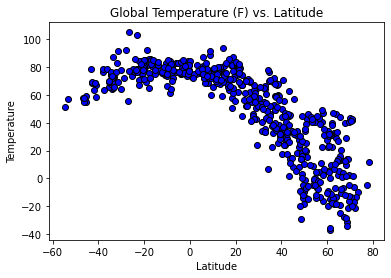

In [99]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], color = 'blue', edgecolor = 'black')

plt.title('Global Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/lat_temp.png')
#There is a strong negative relationship involved here. It is slightly parabolic and implies that the temperature is higher the closer
# you are to the equator

## Latitude vs. Humidity Plot

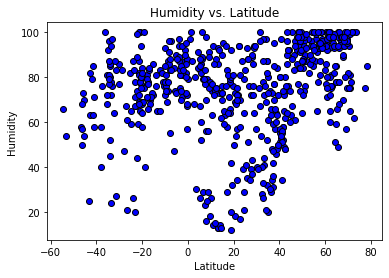

In [100]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], color = 'blue', edgecolor = 'black')

plt.title('Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/lat_humidity.png')
# Humidity tends to congregate around the higher latitude regions implying the higher the latitude the more like you are
# to have a humid day. The relationship is not very strong meaning that any region can potentially have a humid day.

## Latitude vs. Cloudiness Plot

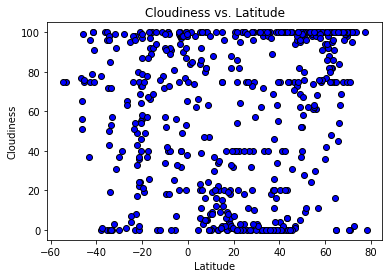

In [101]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], color = 'blue', edgecolor = 'black')

plt.title('Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/lat_cloudiness.png')
# There is almost no noticeable relationship scene implying that all areas are roughly equally capable of having a cloudy day.
# This does make some sense seeing as clouds do not require many conditions to form. 

## Latitude vs. Wind Speed Plot

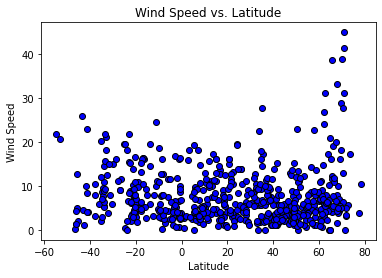

In [102]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], color = 'blue', edgecolor = 'black')

plt.title('Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/lat_wind_speed.png')
# There is a strong slightly negative relationship in regards to wind speed. The plot shows that the closer a city is to the 
# equator the more likely it is to have a have wind speed, which does make sense from a geological standpoint. 

## Linear Regression

In [60]:
north_df = weather_df.loc[(weather_df['Hemi'] == 'north')]
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemi
0,Statesboro,32.4488,-81.7832,55.20,28,0,10.36,US,1642975530,north
2,Kapaa,22.0752,-159.3190,79.12,72,20,3.00,US,1642975532,north
6,Vieux Fort,13.7167,-60.9500,78.12,73,20,17.27,LC,1642975534,north
9,Terrace,54.5163,-128.6035,40.42,100,100,0.74,CA,1642975536,north
10,Khatanga,71.9667,102.5000,-21.23,100,100,3.20,RU,1642975537,north


In [61]:
south_df = weather_df.loc[(weather_df['Hemi'] == 'south')]
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemi
1,Mataura,-46.1927,168.8643,57.47,50,51,1.32,NZ,1642975531,south
3,Carutapera,-1.1950,-46.0200,76.77,92,77,6.62,BR,1642975533,south
4,Mount Gambier,-37.8333,140.7667,76.26,40,78,3.18,AU,1642975533,south
5,Esperance,-33.8667,121.9000,64.24,85,85,14.43,AU,1642975533,south
7,Bluff,-46.6000,168.3333,57.79,58,77,0.20,NZ,1642975535,south


In [74]:
def linear_regression(x,y):
    print(f'R-squared: {round(st.pearsonr(x,y)[0],2)}')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regression_val = x * slope + intercept
    line_formula = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    plt.scatter(x,y)
    plt.plot(x, regression_val, 'r-')
    return line_formula

def annotate(line_formula, a, b):
    plt.annotate(line_formula, (a,b), fontsize = 12, color = 'red')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: -0.83


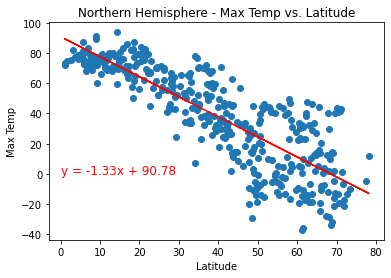

In [75]:
eq = linear_regression(north_df['Lat'], north_df['Max Temp'])
annotate(eq, 0,0)

plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/north_max_temp.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R-squared: 0.51


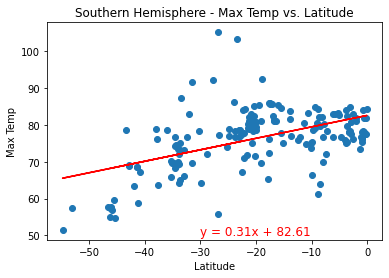

In [78]:
eq = linear_regression(south_df['Lat'], south_df['Max Temp'])
annotate(eq, -30,50)

plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/south_max_temp.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.41


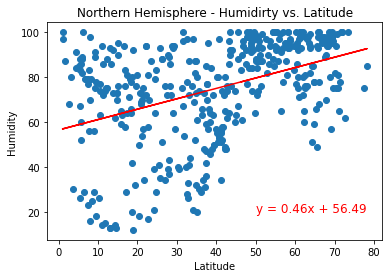

In [82]:
eq = linear_regression(north_df['Lat'], north_df['Humidity'])
annotate(eq, 50,20)

plt.title('Northern Hemisphere - Humidirty vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/north_humidity.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R-squared: 0.32


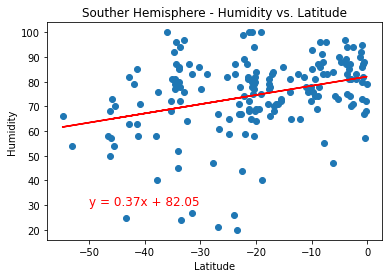

In [89]:
eq = linear_regression(south_df['Lat'], south_df['Humidity'])
annotate(eq, -50,30)

plt.title('Souther Hemisphere - Humidity vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/south_humidity.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.42


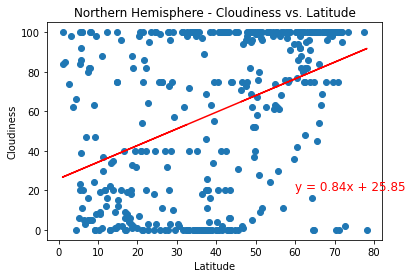

In [90]:
eq = linear_regression(north_df['Lat'], north_df['Cloudiness'])
annotate(eq, 60,20)

plt.title('Northern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/north_cloudiness.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R-squared: 0.12


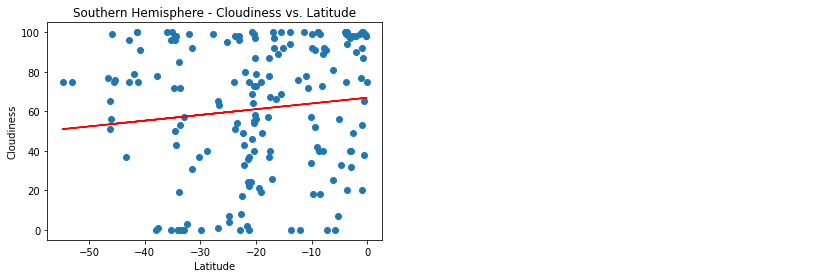

In [92]:
eq = linear_regression(south_df['Lat'], south_df['Cloudiness'])
annotate(eq, 60,20)

plt.title('Southern Hemisphere - Cloudiness vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/south_cloudiness.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: 0.13


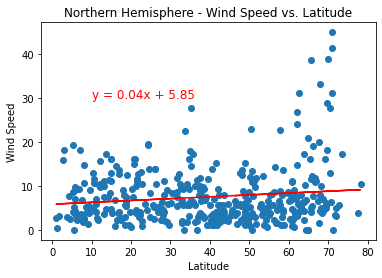

In [94]:
eq = linear_regression(north_df['Lat'], north_df['Wind Speed'])
annotate(eq, 10,30)

plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/north_wind_speed.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R-squared: -0.2


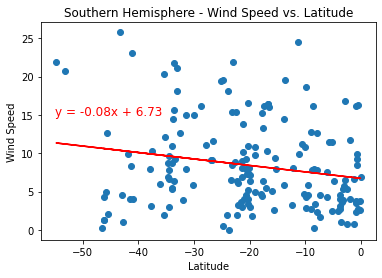

In [98]:
eq = linear_regression(south_df['Lat'], south_df['Wind Speed'])
annotate(eq, -55,15)

plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig(r'C:\Users\rzh00\Documents\gt-virt-atl-data-pt-09-2021-u-c-master\02-Homework\06-Python-APIs\Instructions\output_data/south_wind_speed.png')